# Introduction to Neural Networks


## Homework 1: ANNs and Model Interpretability

**June 2020**<br>
**Instructor:** Pavlos Protopapas<br>

---

In [1]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and are aiming to teach. And, if a problem specifies a particular library, you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [2]:
import random
random.seed(112358)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from random import randint 

from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)  # You should see a 2.0.0 here!

2.1.0


<div class="exercise"> <b> Question 1: Construct a feed forward neural network [25 pts]</b> </div>

In this part of the homework, you are to construct three feed-forward neural networks. Each neural network will consist of 2 hidden layers and an output layer. The three different networks only differ in their number of nodes used for their hidden layer, which we specify in each specific question below. All networks' hidden layers use the sigmoid as the activation function, along with a linear output node. 

**You should code the equations from scratch.**

You are given three datasets containing $(x,y)$ points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

 

**1.1** Read the files into variables named `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$'s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values. 

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.  

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained? 

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

## Answers

**1.1** Read the files into variables named `step_df`, `one_hump_df`, and `two_hump_df`.
Perform a forward pass using a network with one hidden layer with **one** node. The input to the network is the $x$ `step_df.x`.  Adjust the weights manually until the predicted outputs matches as closely as possible to the true $y$'s (`step_df.y`) and plot the output from the network; in the same plot, show the true $y$ values.


In [4]:
def sigmoid(x: float) -> float :
    """The sigmoid function 
    """
    # your code here 
    h = 1.0 / (1.0 + np.exp(-x))
    return h

In [5]:
## read data 
# your code here
step_df = pd.read_csv('data/step_df.csv').sort_values(by = 'x')
one_hump_df = pd.read_csv('data/one_hump_df.csv').sort_values(by = 'x')
two_hump_df = pd.read_csv('data/two_hump_df.csv').sort_values(by = 'x')

In [6]:
# Forward pass
def forward_step(X_in: np.ndarray, WL_0: np.ndarray, 
                 WL_1: np.ndarray, y_out: np.ndarray) -> (float, float) :
    
    """
    This implements forward step:
        z = X_in . WL_0 #Input layer . Weights
        h = sigmoid(z)  #hidden 
        y = h . WL_1    #Output layer 
        (Add intercepts as appropriate)
    
    Args (3 different scenarios 1.1, 1.2 and 1.3): 
        X_in: Input array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array Shape (100,1)
              
        WL_0: Input array [Weights for Layer 0]
              1.1 - Array shape (2,1)
              1.2 - Array shape (2,2)
              1.3 - Array shape (2,4)
              
        WL_1: Input Array [Weights for Layer 1]
              1.1 - Array shape (2,1) 
              1.2 - Array shape (3,1) 
              1.3 - Array shape (5,1)

        y_out: Input Array
              1.1 - Array shape (100,1)
              1.2 - Array shape (100,1)
              1.3 - Array shape (100,1)
              
    Returns:
              1.1 - Output = (100, 1), hidden = (100, 2)
              1.2 - Output = (100, 1), hidden = (100, 3)
              1.3 - Output = (100, 1), hidden = (100, 5)
              (hidden will be utilized for 1.4)    
    """
 
    # your code here 
    #first layer
    X = np.hstack((np.ones((X_in.shape[0],1)), X_in)) #add_ones_col
    z = np.dot(X, WL_0)  #Input layer . Weights
    h = sigmoid(z)  #hidden 
    h = np.hstack((np.ones((h.shape[0],1)), h))
    
    #output layer
    y_output = np.dot(h, WL_1) #Output layer 
    y_output = np.array(y_output, dtype=float)
    
    hidden = np.array(h, dtype=float)
    output = y_output
    return output, hidden

In [7]:
# ONE STEP - one node in hidden layer 
# your code here

X_in = np.array(step_df.x).reshape(-1,1)
WL_0 = np.array([-20, 10.0]).reshape(-1,1)
WL_1 = np.array([0.0, 1.0]).reshape(-1,1)
y_out = np.array(step_df.y).reshape(-1,1)
y_output, hidden= forward_step(X_in, WL_0, WL_1, y_out)

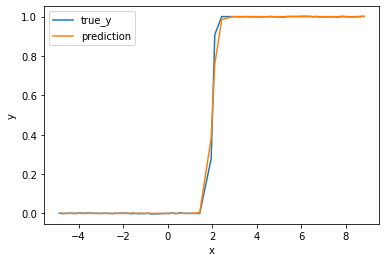

In [8]:
# plot the prediction vs true
# your code here
y_true = np.array(step_df.y).reshape(-1, 1)
plt.plot(X_in, y_true, label='true_y');
plt.plot(X_in, y_output, label='prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

</span></div><div class='alert alert-block alert-danger'><b>Note:</b><span style = 'color:black'> Make sure your submission passes all assert statements we've provided in this notebook.</span></div></div>

In [9]:
### 1.1 Check that you have the requested variables
for var in ['sigmoid', 'forward_step', 'step_df' , 'one_hump_df' , 'two_hump_df']:
    assert var in globals(), f"Variable '{var}' does not exist!"

**1.2** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.


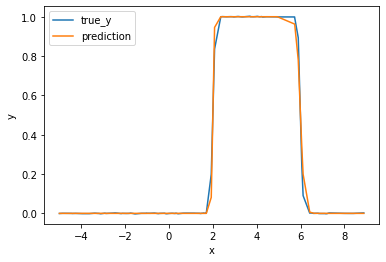

In [10]:
# ONE HUMP  - two nodes in hidden layer
# your code here
X_in = np.array(one_hump_df.x).reshape(-1,1)
WL_0 = np.array([[-70.0, 72.0],[35.0, -12.0]])
WL_1 = np.array([-1.0, 1.0, 1.0]).reshape(-1,1)
y_out = np.array(one_hump_df.y).reshape(-1,1)

y_output, hidden = forward_step(X_in, WL_0, WL_1, y_out)
y_true = np.array(one_hump_df.y).reshape(-1, 1)
plt.plot(X_in, y_true, label='true_y');
plt.plot(X_in, y_output, label='prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

**1.3** Do the same for the **two humps** function data, but this time increase the number of hidden nodes to **four**.


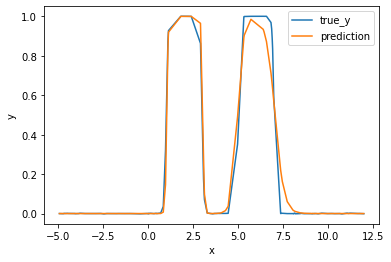

In [11]:
# TWO HUMPS  - four nodes in hidden layer 
# your code here
X_in = np.array(two_hump_df.x).reshape(-1,1)
WL_0 = np.array([[-30.7,26.3,28.5,-76], [6.17,-25.5,-4.041,25.0]])
WL_1 = np.array([0.0, 1.0, -1.0, 1.0, -1.0]).reshape(-1,1)
y_out = np.array(two_hump_df.y).reshape(-1,1)


y_output, hidden= forward_step(X_in, WL_0, WL_1, y_out)
y_true = np.array(two_hump_df.y).reshape(-1, 1)
plt.plot(X_in, y_true, label='true_y');
plt.plot(X_in, y_output, label='prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

**1.4** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of **the output layer's weights** for all three cases (step, one hump, and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What are the optimized weight value and loss you obtained?

__NOTE: Only perform gradient descent for the output layer's weights (the ones that connect the hidden layer to the output layer)__

In [12]:
# Loss function 
def L(y_pred, y):   
    """
    This function returns the appropriate loss given the predictions and actual values
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
    Output:
        loss:   A scalar for the loss"""
    loss = np.mean(np.square(y-y_pred)) #MSE
    # your code here 
    return loss

In [13]:
# derivative with respect to W1
def der_L_WL1(z, y_pred, y):
    """
    This function calculates the derivatives with respect to output weights
    Inputs: 
        y_pred: A vector with the predicted y values 
        y:      A vector with the true y values 
        z:      A vector with the values of the output layer 
    Output:
        ders:   A vector of partial derivatives 
    """
    # your code here 
    
    
    ders = 2 * np.dot(z.T, (y_pred - y)) / len(y) # (2/M) *z.T * (y_pred - y)
    # end of your code here
    return ders # returns vector of partial derivatives

In [14]:
# gradient descent 
def gradient_descent(num_steps, lr, WL0, WL1, X, y):
    """
    This function performs Gradient Descent
    Inputs: 
        num_steps: Number of steps
        lr: Learning Rate
        WL0: Layer 0 weights
        WL1: Layer 1 weights - Initital value
        X: X
        y: y
     Outputs:
        z1:  A vector with the final values of y (after steps steps)
        WL1_n: The final values of WL1 (after steps steps)
        errors: list of errors
    """
    # your code here 
    
    errors = []
    
    output, hidden = forward_step(X, WL0, WL1, y)
    errors.append(L(output, y))
     
    
    for i in range(num_steps):
        der = der_L_WL1(hidden, output, y)
        WL1 = WL1 - lr * der
        output, hidden = forward_step(X, WL0, WL1, y)
        errors.append(L(output, y))
    
    z1 = output
    # end of your code here
    return z1, WL1, errors

#### a) step function NN (a hidden layer with a single node)

optimal weight:
[[-6.99708717e-04]
 [ 1.00273696e+00]]


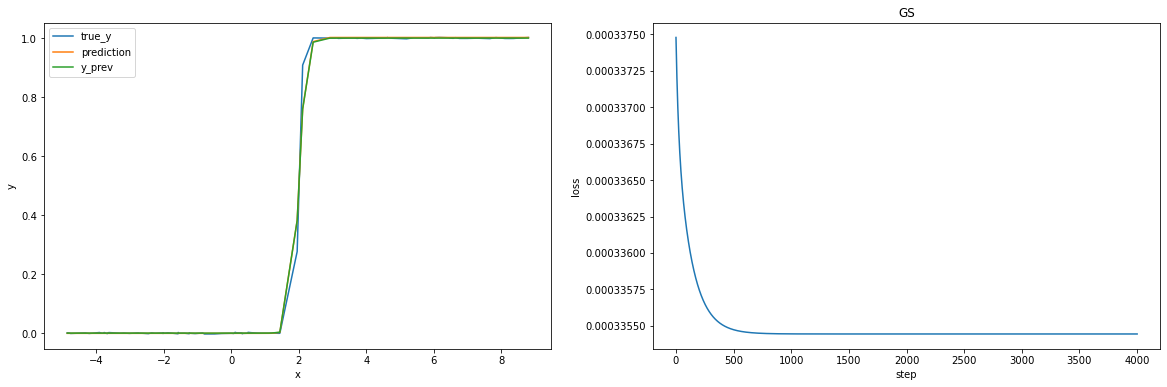

In [15]:
# SINGLE STEP
# your code here 
steps = 4000
X_in = np.array(step_df.x).reshape(-1,1)
WL_0 = np.array([-20, 10.0]).reshape(-1,1)
WL_1 = np.array([0.0, 1.0]).reshape(-1,1)
y_out = np.array(step_df.y).reshape(-1,1)

y_output, final_WL1, errors = gradient_descent(steps, 0.01, WL_0, WL_1, X_in, y_out)


y_prev, hidden = forward_step(X_in, WL_0, WL_1, y_out)
y_true = np.array(step_df.y)

figure, ax = plt.subplots(1, 2, figsize=(20,6));
ax[0].plot(X_in, y_true, label='true_y')
ax[0].plot(X_in, y_output, label='prediction')
ax[0].plot(X_in, y_prev, label='y_prev')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend()


ax[1].plot(range(steps + 1), errors)
ax[1].set_title('GS')
ax[1].set_xlabel('step')
ax[1].set_ylabel('loss');

print(f"optimal weight:\n{final_WL1}")

#### b) one hump function NN (a hidden layer with two nodes)

optimal weight:
[[-1.00616096]
 [ 0.99844126]
 [ 1.00816767]]


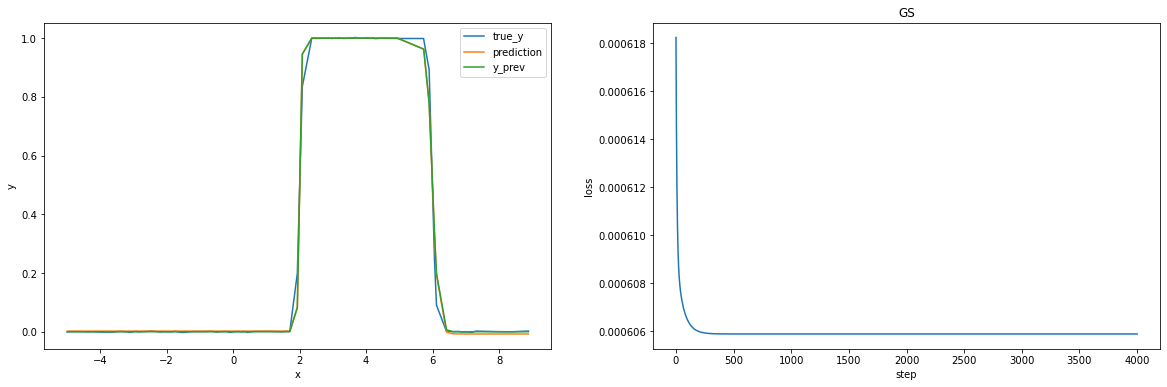

In [16]:
# ONE HUMP
# your code here 
steps = 4000
X_in = np.array(one_hump_df.x).reshape(-1,1)
WL_0 = np.array([[-70.0, 72.0],[35.0, -12.0]])
WL_1 = np.array([-1.0, 1.0, 1.0]).reshape(-1,1)
y_out = np.array(one_hump_df.y).reshape(-1,1)

y_output, final_WL1, errors = gradient_descent(steps, 0.1, WL_0, WL_1, X_in, y_out)

y_prev, hidden = forward_step(X_in, WL_0, WL_1, y_out)
y_true = np.array(one_hump_df.y)

figure, ax = plt.subplots(1, 2, figsize=(20,6));
ax[0].plot(X_in, y_true, label='true_y')
ax[0].plot(X_in, y_output, label='prediction')
ax[0].plot(X_in, y_prev, label='y_prev')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend()

ax[1].plot(range(steps + 1), errors)
ax[1].set_title('GS')
ax[1].set_xlabel('step')
ax[1].set_ylabel('loss');


print(f"optimal weight:\n{final_WL1}")
      

#### c) two hump function NN (a hidden layer with 4 nodes)

optimal weight:
[[-0.14951887]
 [ 1.14487837]
 [-0.98439786]
 [ 1.13971302]
 [-1.01127093]]


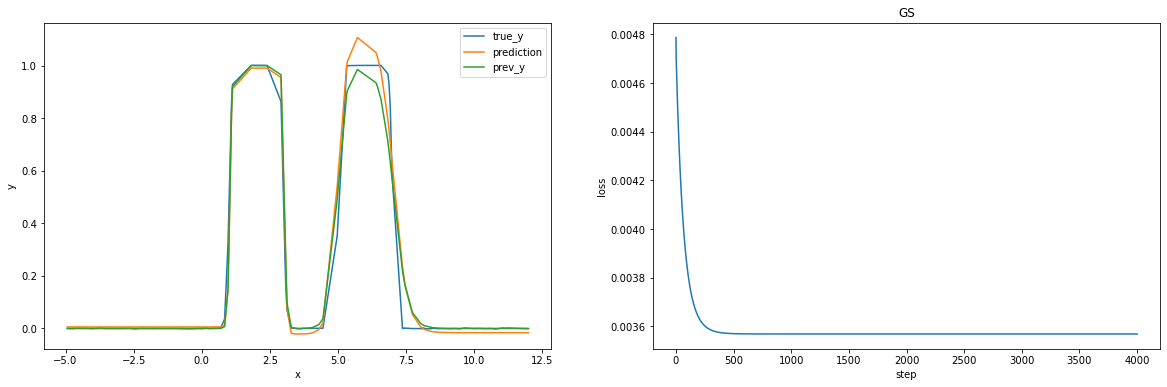

In [17]:
# TWO HUMPS
# your code here 
steps = 4000
X_in = np.array(two_hump_df.x).reshape(-1,1)
WL_0 = np.array([[-30.7,26.3,28.5,-76], [6.17,-25.5,-4.041,25.0]])
WL_1 = np.array([0.0, 1.0, -1.0, 1.0, -1.0]).reshape(-1,1)
y_out = np.array(two_hump_df.y).reshape(-1,1)
y_output, final_WL1, errors = gradient_descent(steps, 0.2, WL_0, WL_1, X_in, y_out)

y_prev, hidden = forward_step(X_in, WL_0, WL_1, y_out)
y_true = np.array(two_hump_df.y).reshape(-1, 1)


figure, ax = plt.subplots(1, 2, figsize=(20,6));
ax[0].plot(X_in, y_true, label='true_y')
ax[0].plot(X_in, y_output, label='prediction')
ax[0].plot(X_in, y_prev, label='prev_y')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend()

ax[1].plot(range(steps+1), errors)
ax[1].set_title('GS')
ax[1].set_xlabel('step')
ax[1].set_ylabel('loss');

print(f"optimal weight:\n{final_WL1}")

<hr style='height:2pt'>
<div class='theme'> Neural Networks part B</div> 

Neural networks are, of course, a large and complex topic that cannot be covered in a single homework. Here, we'll focus on the key idea of ANNs: they are able to learn a mapping from example input data $X$ (of fixed size) to example output data $Y$ (of fixed size). This is the same concept as every other classification and regression task we've learned so far in the semester. We'll also partially explore what patterns the neural network learns and how well neural networks generalize.

In this question, we'll see if neural networks can learn a limited version of the [Fourier Transform.](https://en.wikipedia.org/wiki/Fourier_transform) (The Fourier Transform takes in values from some function and returns a set of sine and cosine functions which, when added together, approximate the original function.)

In symbols: $ \cal{F(s)} = \int_{-\infty}^\infty f(x)e^{- i xs}dx$. In words, the value of the transformed function at some point, $s$, is the value of an integral which measures, in some sense, how much the original $f(x)$ looks like a wave with a period of $s$. As an example, with $f(x) = 4cos(x) + sin(2x)$,  $\cal{F}(s)$ is 0 everywhere except at -2, -1, 1, and 2, mapping to the waves of period 1 and 1/2. The values at these points are linked to the magnitude of the waves, and their phases (roughly: sin waves versus cosine waves).

The only thing about the Fourier transform that matters for this p-set is this: a function goes in, and a re-written form in terms of sine and cosine comes out.

In our specific problem, we'll train a network to map from 1000 sample values from a function (equally spaced along 0 to 10$\pi$) to the four features of the sine and cosine waves that make up that function. Thus, the network is attempting to learn a mapping from a 1000-entry vector down to a 4-entry vector. Our `X_train` dataset's shape is $N x 1000$ and our `y_train` is $N x 4.$

Questions 2.1 and 2.2 will get you used to the format of the data. 

We'll use 6 data files in this question:
- `sinewaves_X_train.npy` and `sinewaves_y_train.npy`: a (10,000 x 1,000) and (10,000 x 4) training dataset. Examples were generated by randomly selecting a,b,c,d in the interval [0,1] and building the curve $a\sin(b\,x) + c\cos(d\,x)$
- `sinewaves_X_test.npy` and `sinewaves_y_test.npy`: a (2,000 x 1,000) and (2,000 x 4) test dataset, generated in the same way as the training data
- `sinewaves_X_extended_test` and `sinewaves_y_extended_test`: a (9 x 1,000) and (9 x 4) test dataset, testing whether the network can generalize beyond the training data (e.g. to negative values of $a$)

**These datasets are read in to their respective variables for you.**

<div class='exercise'> <b> Question 2 [25pts] </b> </div>
    
**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer. 

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

In [18]:
def plot_predictions(model, test_x, test_y, count=None):
    # Model - a tf.keras model that takes in (n,1000) training data and predicts (n,4) output data
    # test_x - a (n,1000) input dataset
    # test_y - a (n,4) output dataset
    # This function will plot the sine curves in the training data and those implied by the model's predictions.
    # It will also print the predicted and actual output values.
    
    #helper function that takes the n by 4 output and reverse-engineers 
    #the sine curves that output would create
    def y2x(y_data):
        #extract parameters
        a=y_data[:,0].reshape(-1,1)
        b=y_data[:,1].reshape(-1,1)
        c=y_data[:,2].reshape(-1,1)
        d=y_data[:,3].reshape(-1,1)

        #build the matching training data
        x_points = np.linspace(0,10*np.pi,1000)
        x_data = a*np.sin(np.outer(b,x_points)) + c*np.cos(np.outer(d,x_points))
        return x_data
    
    #if <20 examples, plot all. If more, just plot 5
    if count==None:
        if test_x.shape[0]>20:
            count=5
        else:
            count=test_x.shape[0]
    
    #build predictions
    predicted = model.predict(test_x)
    implied_x = y2x(predicted)
    for i in range(count):
        plt.plot(test_x[i,:],label='true')
        plt.plot(implied_x[i,:],label='predicted')
        plt.legend()
        plt.ylim(-2.1,2.1)
        plt.xlabel("x value")
        plt.xlabel("y value")
        plt.title("Curves using the Neural Network's Approximate Fourier Transform")
        plt.show()
        print("true:", test_y[i,:])
        print("predicted:", predicted[i,:])
    
    

In [19]:
X_train = np.load('data/sinewaves_X_train.npy')
y_train = np.load('data/sinewaves_y_train.npy')

X_test = np.load('data/sinewaves_X_test.npy')
y_test = np.load('data/sinewaves_y_test.npy')

X_extended_test = np.load('data/sinewaves_X_extended_test.npy')
y_extended_test = np.load('data/sinewaves_y_extended_test.npy')

## Answers:  

**2.1** Plot the first row of the `X_train` training data and visually verify that it is a sinusoidal curve.


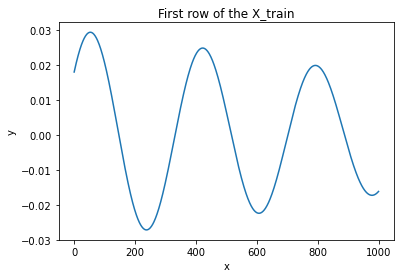

In [20]:
# your code here

plt.plot(X_train[0,], label='First row of the X_train');
plt.title('First row of the X_train')
plt.xlabel("x")
plt.ylabel("y");



The graph vibrates up and down about the x-axis and dampens along the positive x-axis. It looks like the sinusoidal curve

**2.2** The first row of the `y_train` data is $[0.024, 0.533, 0.018, 0.558]$. Visually or numerically verify that the first row of X_train is 1000 equally-spaced samples in $[0,10\pi]$ from the function $f(x) = 0.024\sin(0.533\,x) + 0.018\cos(0.558\,x)$. This pattern (y_train is the true parameters of the curve in X_train) will always hold.


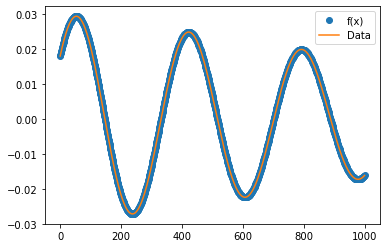

In [21]:
# your code here
x = np.linspace(0, 10 * np.pi, 1000)
f_x = 0.024 * np.sin(0.533 * x) + 0.018 * np.cos(0.558 * x)

plt.plot(f_x, 'o', label='f(x)');
plt.plot(X_train[0,], label='Data')
plt.legend();



In [22]:
# your code here 
assert f_x.all() == X_train[0,].all(), "error"

**2.3** Use `tf.keras` to build a fully-connected neural network:

**a:** Use `tf.keras.models.Sequential` and `tf.keras.layers.Dense` to build the fully-connected neural network. You can choose any number of layers and any number of nodes in each layer.

**b:** Compile your model via the line `model.compile(loss='mean_absolute_error', optimizer='adam')` and display the `.summary()`. Explain why the first layer in your network has the indicated number of parameters.

**c:** Fit your model to the data for $50$ epochs using a batch size of $32$ and a validation split of $0.2$. You can train for longer if you wish -- the fit tends to improve over time.


In [23]:
# build the fully-connected neural network
# your code here

input_size = X_train.shape[1]
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(150, input_shape=(input_size,), activation='relu', name = 'h1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name = 'h2'))
model.add(tf.keras.layers.Dense(50, activation='relu', name = 'h3'))
model.add(tf.keras.layers.Dense(4, activation='linear', name = 'output'))


In [24]:
# Compile your model 
# your code here
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 150)               150150    
_________________________________________________________________
h2 (Dense)                   (None, 100)               15100     
_________________________________________________________________
h3 (Dense)                   (None, 50)                5050      
_________________________________________________________________
output (Dense)               (None, 4)                 204       
Total params: 170,504
Trainable params: 170,504
Non-trainable params: 0
_________________________________________________________________


*your answer here*
There are 1000 input in this model , which means there will be (1000+1)parameters in each node in the first layer(include bias). Since there are 150 nodes in the first layer, the total number of first layer parameters should be $(1000+1) \times 150 = 150150$


---


In [26]:
# Fit your model 
# your code here
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

**2.4** Use the `plot_predictions` function to plot the model's predictions on `X_test` to the true values in `y_test` (by default, it will only plot the first few rows). Report the model's overall loss on the test set. Comment on how well the model performs on this unseen data. Do you think it has accurately learned how to map from sample data to the coefficients that generated the data?


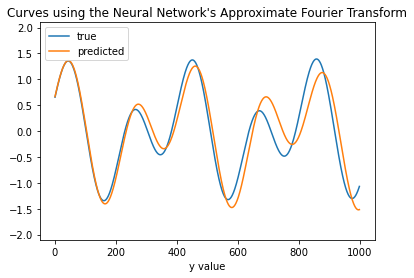

true: [0.86199664 0.98175913 0.65523998 0.4870337 ]
predicted: [0.8706493  0.95540005 0.66741693 0.49484473]


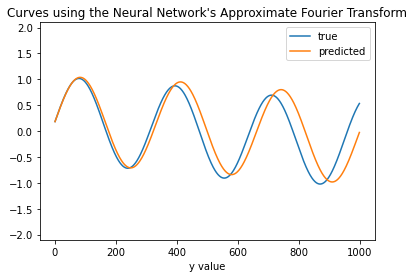

true: [0.8406355  0.63159555 0.18328701 0.11174618]
predicted: [0.85859907 0.60464394 0.18342802 0.08099318]


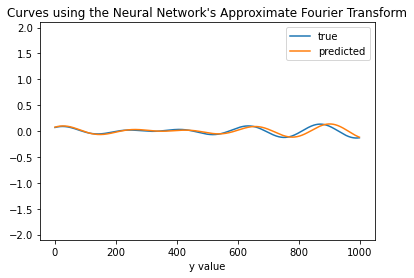

true: [0.06591224 0.75183886 0.06986143 0.91352303]
predicted: [0.07387562 0.7360263  0.0758843  0.87359476]


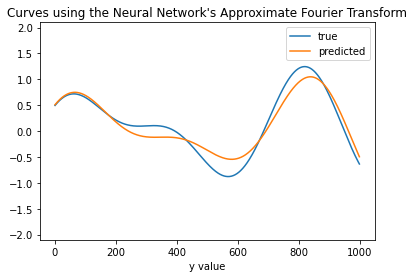

true: [0.75610725 0.30861152 0.49522059 0.48394499]
predicted: [0.73253906 0.3191885  0.5085075  0.4550431 ]


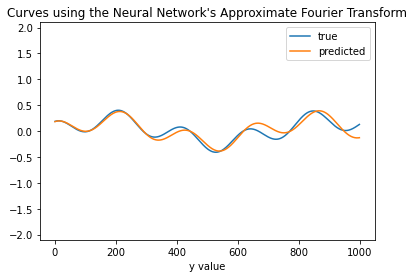

true: [0.2229353  0.27885697 0.18696198 0.94846283]
predicted: [0.2151108  0.29647422 0.18314125 0.91889894]


In [27]:
# your code here
plot_predictions(model,X_test,y_test)

In [28]:
# model's overall loss
# your code here
model.evaluate(X_test, y_test)

2000/2000 [==============================] - 0s 64us/sample - loss: 0.0216


0.021646268531680106

## *your answer here*

The total loss on the test set is 0.0329 and the results of `plot_predictons` show that the model fits test set pretty well. As a result, I think it has accurately learned how to map from sample data to the coefficients that generated the data.

----

**2.5** Examine the model's performance on the 9 train/test pairs in the `extended_test` variables. Which examples does the model do well on, and which examples does it struggle with?


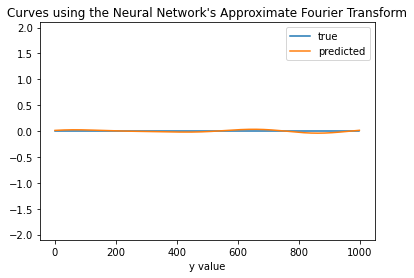

true: [0. 0. 0. 0.]
predicted: [0.02695258 0.40504956 0.01331021 0.58000183]


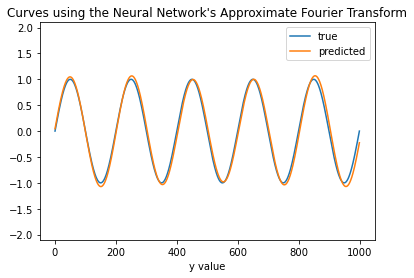

true: [1. 1. 0. 0.]
predicted: [1.0275253  0.9941468  0.04591294 0.7199152 ]


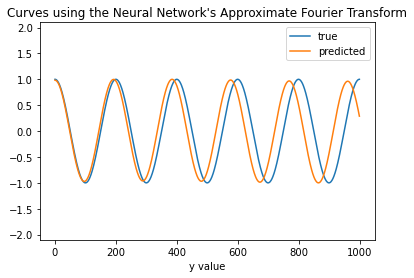

true: [0. 0. 1. 1.]
predicted: [0.01933694 0.16095757 0.981766   1.0398988 ]


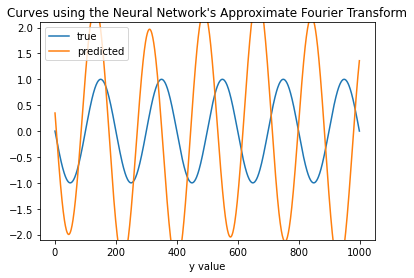

true: [-1.  1.  0.  0.]
predicted: [ 2.3130853  -1.1262238   0.34908915 -0.30820438]


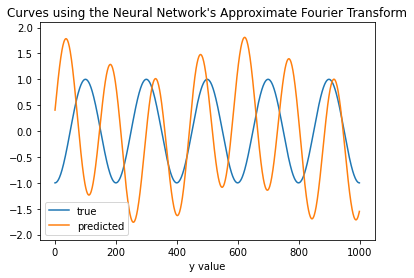

true: [ 0.  0. -1.  1.]
predicted: [ 1.4069686   1.3639109   0.40539706 -0.3260645 ]


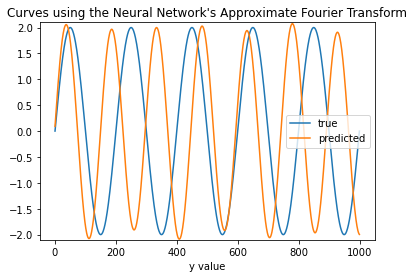

true: [2. 1. 0. 0.]
predicted: [1.9975052  1.3468206  0.0906089  0.74702764]


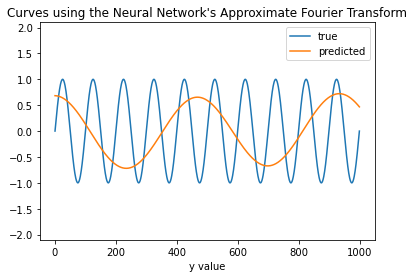

true: [1. 2. 0. 0.]
predicted: [-0.03889016  0.15657306  0.6838653   0.4283819 ]


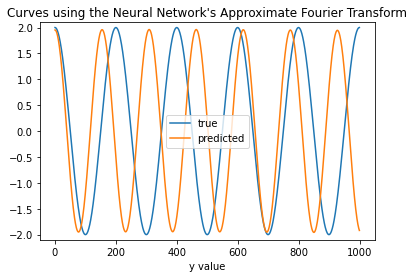

true: [0. 0. 2. 1.]
predicted: [0.00914811 0.1349091  1.9525523  1.2933937 ]


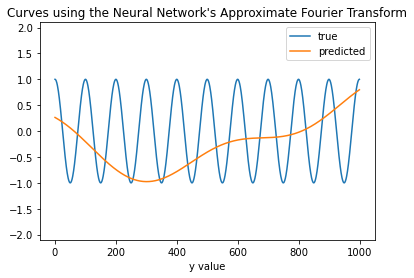

true: [0. 0. 1. 2.]
predicted: [ 0.7518395  -0.13725969  0.26338837  0.363133  ]


In [29]:
# your code here
plot_predictions(model,X_extended_test,y_extended_test)

*Your answer here*


When the true value of the coefficients is between [0, 1], the model has a relatively good fitting. But when the true value of coefficients is beyond this range, the model has poor performance.

----

**2.6** Is there something that stands out about the difficult examples, especially with respect to the data the model was trained on? Did the model learn the mapping we had in mind? Would you say the model is overfit, underfit, or neither?

**Hint**:
- The Tensorflow 2.0 [`tf.keras` (here)](https://www.tensorflow.org/guide/keras) documentation and examples of a Sequential model are a good place to start.
- A strong model can achieve validation error of around 0.03 on this data and 0.02 is very good.

*Your answer here*



The model can be pretty strong when the test set is not too different from the training set. However, if the test set is outside the range of the training set or they are not from the same distribution(see Figure 2), the model no longer have the ability to make an accurate prediction and the model didn't learn the mapping we had in mind. The model is neither overfit nor underfit because it works samely well in both training test and test data in question 2.3 and 2.4(see Figure 1, the val loss is below 0.03 in the end).

---

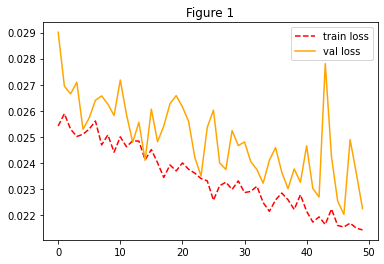

In [31]:
hist = model.history.history
plt.plot(hist['loss'], c = 'r', ls = '--', label = 'train loss')
plt.plot(hist['val_loss'], c = 'orange', label = 'val loss')
plt.title('Figure 1')

plt.legend()
plt.show()

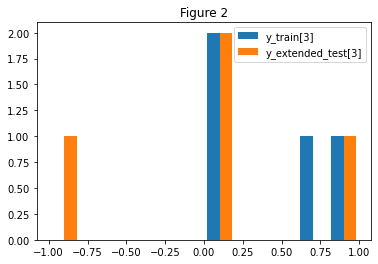

In [32]:
plt.hist([y_train[3],y_extended_test[3]])
plt.legend(['y_train[3]', 'y_extended_test[3]'])
plt.title('Figure 2')
plt.show()

<hr style='height:2pt'>

<div class='theme'> Regularizing Neural Networks </div>

In this problem set, we have already explored how ANNs are able to learn a mapping from example input data (of fixed size) to example output data (of fixed size), and how well the neural network can generalize. In this problem, we focus on issues of overfitting and regularization in neural networks.

As we have explained in class, ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.

There are several methods used to improve ANN generalization. One approach is to use an architecture just barely wide or deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.

However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella of regularization.

In this problem, you are asked to regularize a network given to you below.
    
For this problem, we will be working with a modified version of MNIST dataset (MNIST CS109, MNIST: Modified National Institute of Standards and Technology database), which is a large database of handwritten digits and commonly used for training various image processing systems. This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. For pedagogical simplicity, we will only use the digits labeled `4` and `9`, and we want to use a total of 1600 samples for training (this includes the data you will use for validation).

We have selected the samples for you and the dataset is available at https://www.kaggle.com/c/intro-to-nns-hw1-june-2020/data. You have to create an account on Kaggle and join the competition via https://www.kaggle.com/t/ec2eba573312496d8f53a8ec8f18695d. This is a limited participation competition. Please do not share link. Note, it's not technically a competition, as your goal is merely to create an appropriate, strong model that performs well. We will evaluate your skills based on this, not in terms of how you compare to your classmates.

`x_train_mnist_cs109.csv` is our training dataset, last column is the target column. Class 0 means sample is handwritten digit 4 and class 1 means sample is handwritten digit 9.  784 columns correspond to 28x28 image size. 


`x_test_mnist_cs109.csv` has  structure similar to `x_train_mnist_cs109.csv` with no labels. `x_test_mnist_cs109.csv` has 3200  samples. Kaggle leaderboard scores are accuracy scores calculated on this test set.  

`sample_submission.csv` is the format that kaggle will accept.



<div class='exercise'> <b> Question 3 [25 pts] </b> </div>
    
**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`: 

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100, 100, 100
2. Activation function: ReLU 
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid 
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 

<span style='color:red'>**Important:**</span> You must also print out the final train & validation accuracy score of your overfit model. These are needed for evaluating Q3.3

**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation. 


- 3.3.1 Display model summary, training and validation accuracy and loss. 
<span style='color:red'>**Important:**</span> You _must_ print out the final train accuracy score of your good model. This is needed for evaluating Q3.3
- 3.3.2 Print the difference between training and validation accuracy and loss.
- 3.3.3 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.4 Save the model using `model.save(filename)` and **submit it on canvas along with your notebook**. Code on how to save your model is provided below.
- 3.3.5 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Fill the cell below that starts with ###
(Kaggle_name) ###.** 




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model. 

- **No CNNs allowed for this competition.**

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- **Do not create multiple accounts on Kaggle.**


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit. 

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students




## Answers

**3.1**  Download data from the competition page. You should have three files `x_train_mnist_cs109.csv`, `x_test_mnist_cs109.csv` and `sample_submission.csv`. We will utilize `x_test_mnist_cs109.csv` in 3.3.  Load the data and use the matplotlib function `imshow` to display a handwritten 4 and a handwritten 9.


In [33]:
# your code here
x_train_mnist = pd.read_csv('data/x_train_mnist_cs109.csv')
x_test_mnist = pd.read_csv('data/x_test_mnist_cs109.csv')
sample_submission= pd.read_csv('data/sample_submission.csv')


x_train_mnist.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,1,0,98,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,...,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


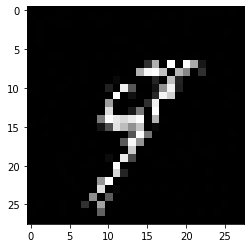

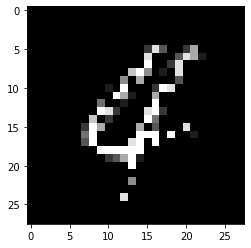

In [34]:
plt.imshow(x_train_mnist.loc[0].values[0:-1].reshape(28,28),cmap='gray')
plt.show()
plt.imshow(x_train_mnist.loc[4].values[0:-1].reshape(28,28),cmap='gray')
plt.show()

**3.2** **Overfit an ANN:** Build a fully-connected network (FCN) using `tensorflow.keras` and assign it to a variable called `model_overfit`:

1. Number of hidden layers: 3
2. Nodes per hidden layer: 100, 100, 100
2. Activation function: ReLU
3. Loss function: binary_crossentropy
4. Output unit: Sigmoid
5. Optimizer: adam (use the defaults; no other tuning)
6. Epochs: no more than 2,000
7. Batch size: 128
8. Validation size: .3

This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the # of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting.

<span style='color:red'>**Important:**</span> You must also print out the final train & validation accuracy score of your overfit model. These are needed for evaluating Q3.3



In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

In [36]:
# your code here



num_of_h = 3
num_node = 100
num_class = 2
activ_f = 'relu'
loss_f = 'binary_crossentropy'
output_f = 'sigmoid'
optim = 'adam'
epoch = 2000
batch_size = 128
valid_size = .3
input_size = (784,)
x_train = np.array(x_train_mnist.drop(x_train_mnist.columns[len(x_train_mnist.columns)-1], axis=1))
y_train = np.array(x_train_mnist[x_train_mnist.columns[-1]])

model_overfit = Sequential(name='overfit_model')
model_overfit.add(Dense(num_node, input_shape=input_size, activation=activ_f))

for i in range(num_of_h - 1):
    model_overfit.add(Dense(num_node, activation=activ_f))
    
model_overfit.add(Dense(num_class-1, activation=output_f))

model_overfit.summary()



Model: "overfit_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_overfit.compile(optimizer=optim, loss=loss_f, metrics=['accuracy'])
history = model_overfit.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, validation_split=valid_size, verbose=0)

Overfit model:
train accuracy: 1.0
train loss: 6.4468132673515094e-09
validation accuracy: 0.8770833611488342
validation loss: 1.269798461596171
difference between train and validation accuracy: 0.12291663885116577
difference between train and validation loss: -1.2697984551493577


S1 =0.12291663885116577


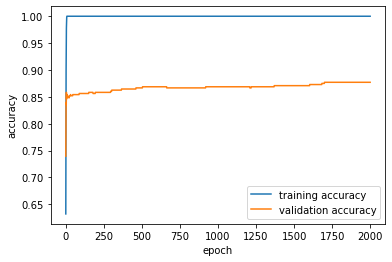

In [38]:
plt.plot(history.history['accuracy'],label='training accuracy');
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

print("Overfit model:")
print("train accuracy: {}".format(history.history['accuracy'][-1]))
print("train loss: {}".format(history.history['loss'][-1]))
print("validation accuracy: {}".format(history.history['val_accuracy'][-1]))
print("validation loss: {}".format(history.history['val_loss'][-1]))
print("difference between train and validation accuracy: {}".format(history.history['accuracy'][-1]-history.history['val_accuracy'][-1]))
print("difference between train and validation loss: {}".format(history.history['loss'][-1]-history.history['val_loss'][-1]))
print(f"\n\nS1 ={history.history['accuracy'][-1]-history.history['val_accuracy'][-1]}")

*your answer here*

Besides the increasing of epoches, the training accuracy sharply rise to 1 and keep on 1 until the finishing of the training. The validation accuracy almost acts in the same way. Instead of sharply rise at the beginning of training and keep accuracy on 1, the validation accuracy oscillate a little bit at the beginning of training then keep on about 0.89 forever.

In conclusion, the training accuracy and validation accuracy curves do not converge together but seperate until the end of training. That means model is overfit. 


**3.3** Create an ANN that doesn't overfit and compete on Kaggle.

Keep the architecture above as is. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation.


- 3.3.1 Display model summary, training and validation accuracy and loss.
<span style='color:red'>**Important:**</span> You _must_ print out the final train accuracy score of your good model. This is needed for evaluating Q3.3
- 3.3.2 Print the difference between training and validation accuracy and loss.
- 3.3.3 Plot the training accuracy and validation accuracy as a function of epochs.
- 3.3.4 Save the model using `model.save(filename)` and **submit it along with your notebook**. Code on how to save your model is provided below.
- 3.3.5 **Submit your Kaggle name that you have used on the leaderboard. *We can't give you credit without this* . Fill the cell below that starts with ### (Kaggle_name) ###.**




**RULES:**

- **Please do not manually label your submissions.** In other words the labels should be the outcome of your model.

- **No CNNs allowed for this competition.**

- **No external data are allowed, please only use the x_train_mnist_cs109.csv for training the models.**

- **Do not create multiple accounts on Kaggle.**


**Grading:** (all accuracies are in percentages)

S1: (Model overfit training accuracy - Model overfit validation accuracy)  => How much are you overfitting 3.2  ?

S2: (Good model training accuracy - Good model average on Kaggle)  => How much are you overfitting on kaggle 3.3

S3: (min (0, Good model training accuracy - Model overfit training accuracy )) => Your good model accuracy must be higher than model overfit.

score = S1 - S2 + S3

1. score > 1 : 4pt
2. score > 1.5-2.0 : 8pts
3. score > 2.0: 12pts
4. 3pt extra to the top 10 students



### (Group 3) ###

**Your Kaggle Leaderboard name(No credit without the name!) = Group 3 **

In [39]:
# your code here
valid_size = .3
x_train = x_train_mnist.drop(x_train_mnist.columns[len(x_train_mnist.columns)-1], axis=1)
y_train = x_train_mnist[x_train_mnist.columns[-1]]



X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = valid_size)
X_val = X_val.values.reshape(-1, 28,28,1)
X_train = X_train.values.reshape(-1,28,28,1)
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(Y_val))
print(np.shape(X_val))

(1120, 28, 28, 1)
(1120,)
(480,)
(480, 28, 28, 1)


In [40]:
x_test_mnist.head()

#x_test = np.array(x_test_mnist.drop(x_test_mnist.columns[len(x_test_mnist.columns)], axis=1))
x_test = x_test_mnist

In [41]:

# your code here
num_of_h = 3
num_node = 100
num_class = 2
activ_f = 'relu'
loss_f = 'binary_crossentropy'
output_f = 'sigmoid'
input_size = 784

optim = 'sgd'
epoch = 2000
batch_size = 200


model = Sequential(name='model')
model.add(Reshape((784,), input_shape=(28,28,1)))

model.add(Dense(num_node, activation=activ_f, kernel_regularizer=regularizers.l2(0.01)))


for i in range(num_of_h - 1):
    model.add(Dropout(0.1))
    model.add(Dense(num_node, activation=activ_f, kernel_regularizer=regularizers.l2(0.01)))
    
    

model.add(Dropout(0.1))
model.add(Dense(num_class-1, activation=output_f, kernel_regularizer=regularizers.l2(0.01)))

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0     

In [43]:

optim = SGD(learning_rate=0.01, momentum=0.1)
model.compile(optimizer=optim, loss=loss_f, metrics=['accuracy'])



datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

print(np.shape(X_train))
datagen.fit(X_train)


print(np.shape(Y_train))
print(np.shape(X_train))
print(np.shape(Y_val))
print(np.shape(X_val))

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), steps_per_epoch=X_train.shape[0] // batch_size, epochs=epoch, verbose=0, validation_data=(X_val, Y_val))
print(np.shape(Y_train))


(1120, 28, 28, 1)
(1120,)
(1120, 28, 28, 1)
(480,)
(480, 28, 28, 1)
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']


KeyboardInterrupt: 

Overfit model:
train accuracy: 0.972000002861023
train loss: 0.23656004071235656
validation accuracy: 0.9854166507720947
validation loss: 0.19414165864388147
difference between train and validation accuracy: -0.013416647911071777
difference between train and validation loss: 0.04241838206847509


Approx S2 =-0.013416647911071777


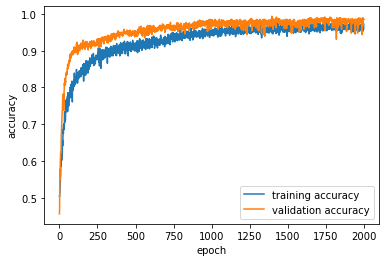

In [14]:
# your code here
plt.plot(history.history['accuracy'],label='training accuracy');
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

print("Overfit model:")
print("train accuracy: {}".format(history.history['accuracy'][-1]))
print("train loss: {}".format(history.history['loss'][-1]))
print("validation accuracy: {}".format(history.history['val_accuracy'][-1]))
print("validation loss: {}".format(history.history['val_loss'][-1]))
print("difference between train and validation accuracy: {}".format(history.history['accuracy'][-1]-history.history['val_accuracy'][-1]))
print("difference between train and validation loss: {}".format(history.history['loss'][-1]-history.history['val_loss'][-1]))
print(f"\n\nApprox S2 ={history.history['accuracy'][-1]-history.history['val_accuracy'][-1]}")


In [21]:
submission=sample_submission.copy()
print(np.shape(x_test_mnist))
submission['category']=(model.predict(np.array(x_test_mnist.values.reshape(-1,28,28,1)))>0.5)*1
submission.to_csv('submission_final.csv',index=False)

(3200, 784)


In [22]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


---

*Reference*


https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

https://www.unf.edu/~xudong.liu/classes/2019Fall/CIS6930/Slides/ch4.pdf

----